In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir(r"C:\Users\Capta\Documents\GitHub\csgo_econ_viz")

In [3]:
econ_data = pd.read_csv("data/raw/economy.csv", parse_dates=["date"])
results_data = pd.read_csv("data/raw/results.csv", parse_dates=["date"])
players_data = pd.read_parquet("data/raw/players.parquet")

C:\Users\Capta\AppData\Local\Temp\ipykernel_31620\4238222839.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  econ_data = pd.read_csv("data/raw/economy.csv", parse_dates=["date"])


In [13]:
players_data.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.500000,80.000000,0.93,7.0,9.0,-2.0,70.400002,63.599998,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,3.0,79.500000,53.299999,1.12,4.0,8.0,-4.0,40.700001,54.500000,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,1.0,81.500000,63.599998,1.03,9.0,9.0,0.0,87.900002,73.300003,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,0.0,67.199997,66.699997,0.97,1.0,9.0,-8.0,14.800000,45.500000,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.900002,81.800003,0.96,8.0,7.0,1.0,56.299999,80.000000,0.99


In [7]:
id_number = 2339402
econ_data.query("match_id == @id_number")

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,...,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

results_data.query("match_id == @id_number")

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
658,2020-03-01,G2,Natus Vincere,Mirage,2,16,2,2,1,2,1,14,4901,2339402,8,6,0,3,2
659,2020-03-01,G2,Natus Vincere,Nuke,4,16,2,2,3,2,1,14,4901,2339402,8,6,0,3,2
663,2020-03-01,G2,Natus Vincere,Dust2,13,16,2,1,7,8,6,8,4901,2339402,8,6,0,3,2


In [12]:

team_name = "G2"
players_data.query("team == @team_name").head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
20,2020-02-26,AmaNEk,G2,mousesports,France,9616,2339384,4901,IEM Katowice 2020,3,...,5.0,111.400002,87.5,1.65,10.0,10.0,0.0,68.099998,60.000000,1.00
21,2020-02-26,JaCkz,G2,mousesports,France,284,2339384,4901,IEM Katowice 2020,3,...,6.0,113.900002,100.0,1.80,5.0,9.0,-4.0,37.299999,60.000000,0.69
24,2020-02-26,huNter-,G2,mousesports,Serbia,3972,2339384,4901,IEM Katowice 2020,3,...,3.0,108.599998,87.5,1.52,13.0,8.0,5.0,89.500000,80.000000,1.29
26,2020-02-26,kennyS,G2,mousesports,France,7167,2339384,4901,IEM Katowice 2020,3,...,2.0,81.199997,100.0,1.33,18.0,9.0,9.0,136.399994,86.699997,2.10
27,2020-02-26,nexa,G2,mousesports,Serbia,9618,2339384,4901,IEM Katowice 2020,3,...,5.0,74.199997,87.5,1.37,11.0,8.0,3.0,60.900002,80.000000,1.41


In [10]:
econ_results_merged = pd.merge(econ_data, results_data, on = ["match_id", "_map"], how = "left")
map = 3
t1_cols = [f"{i}_t1" for i in range(1, 31)]
t2_cols = [f"{i}_t2" for i in range(1, 31)]
t1_econ = econ_results_merged.query("match_id == @id_number").loc[map -1, t1_cols].dropna()
t2_econ = econ_results_merged.query("match_id == @id_number").loc[map- 1, t2_cols].dropna()
t1_econ.index = t1_econ.index.str.replace("_t1", "", regex=False)
t2_econ.index = t2_econ.index.str.replace("_t1", "", regex=False)

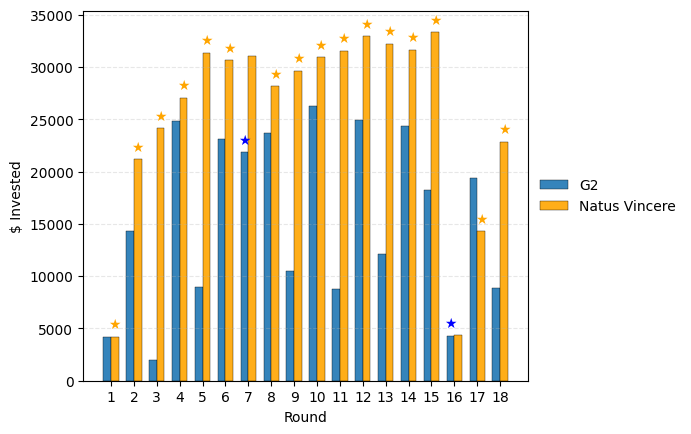

In [11]:
x = np.arange(len(t1_econ)) *1.5

plt.bar(x - 0.25, t1_econ, width=0.5, alpha=0.9, edgecolor="black", linewidth=0.3,
        label=econ_results_merged.query("match_id == @id_number").loc[0, "team_1_x"])
plt.bar(x + 0.25, t2_econ, width=0.5, alpha=0.9, edgecolor="black", linewidth=0.3, color="orange",
        label=econ_results_merged.query("match_id == @id_number").loc[0, "team_2_x"])

plt.xticks(x, [str(i) for i in range(1, len(t1_econ)+1)])
plt.xlabel("Round")
plt.ylabel("$ Invested")

plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.xticks(x, [str(i) for i in range(1, len(t1_econ)+1)])

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.margins(y=0.06)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
plt.subplots_adjust(right=0.82)

for i in range(len(t1_econ)):
    winner = econ_results_merged.loc[map -1, f"{i+1}_winner"] 
    if winner == 1:
        plt.text(i*1.5 - 0.25, t1_econ.iloc[i] + 500, "★",
                 ha="center", va="bottom", color="blue")
    elif winner == 2:
        plt.text(i*1.5 + 0.25, t2_econ.iloc[i] + 500, "★",
                 ha="center", va="bottom", color="orange")